In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session
from tensorflow import keras

%matplotlib inline

## Lab vanishing gradient


In this lab you will impement a complete exploration and results visualization for the following experiment configurations  with dense neural networks:

- with the following numbers of layers [2,3,4,5,6,7,8,9,10]
- with the following neurons per layer [3,5,10,30]
- with activations ReLU, Sigmoid and LeakyReLU

In total, you must train and test 36 network architectures for each activation function.

The experimentation must be done with the MNIST Digits datasets (1500 items) using a random partition of 50/50 for train and test.

For each configuration you must record the **accuracy in test** and the **time used to train** the model.

Then, you will need to build the following visualizations

- one heat map for each activation function illustrating the **accuracy in test** for each configuration
- one heat map for each activation function illustrating the **time used to train** for each configuration
- a scatter plot of all your experiments, showing:
    - the time used to train in the x-axis
    - the accuracy in test in the y-axis
    - the number of layers as the size of the dots
    - expetiments for each activation function in different colors   
- a bar plot showing the average performance of each activation function for each number of layers.




In [35]:
layers = [2,3,4,5,6,7,8,9,10]
neurons = [3,5,10,30]
activation = ['relu','sigmoid',tf.nn.leaky_relu]
reluAcc= np.zeros((len(layers), len(neurons)))
reluTime = np.zeros((len(layers), len(neurons)))
leakyAcc= np.zeros((len(layers), len(neurons)))
leakyTime= np.zeros((len(layers), len(neurons)))

sigTime= np.zeros((len(layers), len(neurons)))
sigAcc= np.zeros((len(layers), len(neurons)))


mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print "dimension de las imagenes y las clases", X.shape, y.shape


dimension de las imagenes y las clases (1500, 784) (1500,)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
X_train = X_train[:5]
X_test  = X_test[:5]
y_train_oh = np.eye(10)[y_train[:5]]
y_test_oh  = np.eye(10)[y_test[:5]]
print X_train.shape, y_train_oh.shape

(5, 784) (5, 10)


In [41]:
def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

In [42]:
for i, layer in enumerate(layers, start=0):
    for j, neuron in enumerate(neurons, start=0):
        for k, act in enumerate(activation, start=0):
            model = get_model(num_hidden_layers=layer, hidden_size=neuron,activation=act)
            #!rm -rf log/sigmoid
            #tb_callback = keras.callbacks.TensorBoard(log_dir='./log/', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
            startFit =time.time()
            #time_callback = TimeHistory()
            model.fit(X_train, y_train_oh, epochs=1, batch_size=1)
            endFit = time.time() - startFit 
            score, acc = model.evaluate(X_test, y_test_oh,
                            batch_size=1)
            value = (acc,endFit)
            print(i,j,value)
            if (k == 'relu'):
                reluAcc[i][j] = acc
                reluTime[i][j] = endFit
            elif (k == 'sigmoid'):
                sigTime[i][j] = endFit
                sigAcc[i][j] = acc
            elif (k == tf.nn.leaky_relu):
                leakyAcc[i][j]= acc
                leakyTime[i][j] = endFit
    

Epoch 1/1
5/5 [==============================] - 0s 27ms/step
(0, 0, (0.0, 1.6469919681549072))
Epoch 1/1
5/5 [==============================] - 0s 16ms/step
(0, 0, (0.2, 1.1050379276275635))
Epoch 1/1
5/5 [==============================] - 0s 19ms/step
(0, 0, (0.4, 1.425050973892212))
Epoch 1/1
5/5 [==============================] - 0s 20ms/step
(0, 1, (0.0, 2.031301975250244))
Epoch 1/1
5/5 [==============================] - 0s 17ms/step
(0, 1, (0.2, 1.1855289936065674))
Epoch 1/1
5/5 [==============================] - 0s 21ms/step
(0, 1, (0.0, 1.7608060836791992))
Epoch 1/1
5/5 [==============================] - 0s 21ms/step
(0, 2, (0.0, 1.3336718082427979))
Epoch 1/1
5/5 [==============================] - 0s 37ms/step
(0, 2, (0.0, 1.5445501804351807))
Epoch 1/1
5/5 [==============================] - 0s 22ms/step
(0, 2, (0.2, 1.5425100326538086))
Epoch 1/1
5/5 [==============================] - 0s 18ms/step
(0, 3, (0.2, 1.2909009456634521))
Epoch 1/1
5/5 [===========================

5/5 [==============================] - 0s 26ms/step
(3, 3, (0.0, 1.6953661441802979))
Epoch 1/1
5/5 [==============================] - 0s 23ms/step
(3, 3, (0.0, 2.0190579891204834))
Epoch 1/1
5/5 [==============================] - 0s 28ms/step
(3, 3, (0.2, 2.3682289123535156))
Epoch 1/1
5/5 [==============================] - 0s 24ms/step
(4, 0, (0.2, 1.754270076751709))
Epoch 1/1
5/5 [==============================] - 0s 22ms/step
(4, 0, (0.0, 2.125605821609497))
Epoch 1/1
5/5 [==============================] - 0s 69ms/step
(4, 0, (0.0, 3.687894105911255))
Epoch 1/1
5/5 [==============================] - 0s 27ms/step
(4, 1, (0.0, 2.5741829872131348))
Epoch 1/1
5/5 [==============================] - 0s 26ms/step
(4, 1, (0.0, 2.8546910285949707))
Epoch 1/1
5/5 [==============================] - 0s 27ms/step
(4, 1, (0.2, 2.473798990249634))
Epoch 1/1
5/5 [==============================] - 0s 26ms/step
(4, 2, (0.0, 2.161540985107422))
Epoch 1/1
5/5 [==============================] - 0s 26m

5/5 [==============================] - 0s 37ms/step
(7, 2, (0.0, 4.439890146255493))
Epoch 1/1
5/5 [==============================] - 0s 31ms/step
(7, 2, (0.0, 3.491238832473755))
Epoch 1/1
5/5 [==============================] - 0s 39ms/step
(7, 2, (0.0, 4.990422964096069))
Epoch 1/1
5/5 [==============================] - 0s 43ms/step
(7, 3, (0.2, 3.4792640209198))
Epoch 1/1
5/5 [==============================] - 0s 38ms/step
(7, 3, (0.2, 4.90941596031189))
Epoch 1/1
5/5 [==============================] - 0s 35ms/step
(7, 3, (0.0, 5.413500070571899))
Epoch 1/1
5/5 [==============================] - 0s 39ms/step
(8, 0, (0.0, 3.0649631023406982))
Epoch 1/1
5/5 [==============================] - 0s 54ms/step
(8, 0, (0.0, 4.407750129699707))
Epoch 1/1
5/5 [==============================] - 0s 35ms/step
(8, 0, (0.2, 4.2158379554748535))
Epoch 1/1
5/5 [==============================] - 0s 31ms/step
(8, 1, (0.2, 3.1012279987335205))
Epoch 1/1
5/5 [==============================] - 0s 46ms/ste

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


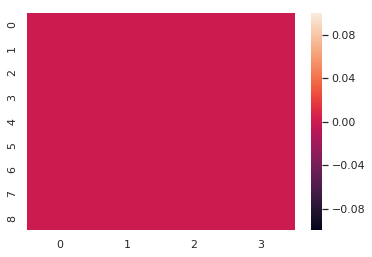

In [54]:
import seaborn as sns; sns.set()
ax = sns.heatmap(reluTime)
print(reluTime[:10,])

Your visualizations must look similar to these ones:

![alt text](./Images/lab_vanishing_01.png)
![alt text](./Images/lab_vanishing_02.png)
![alt text](./Images/lab_vanishing_03.png)
![alt text](./Images/lab_vanishing_04.png)
![alt text](./Images/lab_vanishing_05.png)


In [27]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)